<a href="https://colab.research.google.com/github/ersjunior/3DTS-DataProcessingWithPython/blob/main/Desafios/desafio_A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Final

### Regressão Linear: Exercício

* Monte um algoritmo preditivo de projeção OU de classificação,
utilizando respetivamente Regressão Linear ou Regressão Logística.

* Para tal, selecione uma base de dados adequada no
https://www.kaggle.com/datasets.

* Antes de realizar o treino do seu algoritmo realize uma análise exploratória, principalmente correlacionando as features e o label.
Identificados estes, siga o processo de treinar, validar, testar e revalidar. Não esqueça de apresentar sua conclusões de negócio (utilize o botão +texto)

# Importando as bibliotecas necessárias

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import statsmodels.api as sm
from google.colab import drive
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

# Acessando e Analisando a base de dados

In [10]:
# Monta o Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


* Inspeção de Dados

In [11]:
# Caminho completo do arquivo CSV no Google Drive
caminho_arquivo = '/content/drive/MyDrive/advertising.csv'

# Lendo o arquivo CSV e carregando em um DataFrame
df = pd.read_csv(caminho_arquivo)

# Visualizando o dataframe + dados
print(df.shape)
df.head(5)

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
round(df.describe(),2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,15.13
std,85.85,14.85,21.78,5.28
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,11.00
50%,149.75,22.90,25.75,16.00
75%,218.82,36.52,45.10,19.05
max,296.40,49.60,114.00,27.00


* Limpeza de dados

In [17]:
# Verificando valores nulos
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

* Não há valores NULL no conjunto de dados, portanto, é limpo.

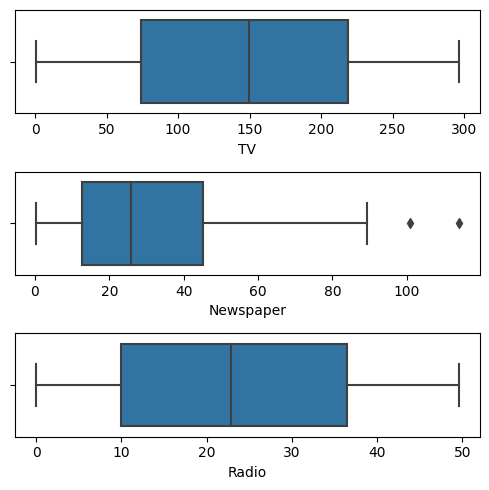

In [22]:
# Análise Outlier
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x=df['TV'], ax = axs[0])
plt2 = sns.boxplot(x=df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=df['Radio'], ax = axs[2])
plt.tight_layout()

* Não há outliers consideráveis presentes nos dados

# Análise exploratória de dados

* Análise Univariada

In [ ]:
# Vendas (variável de destino)


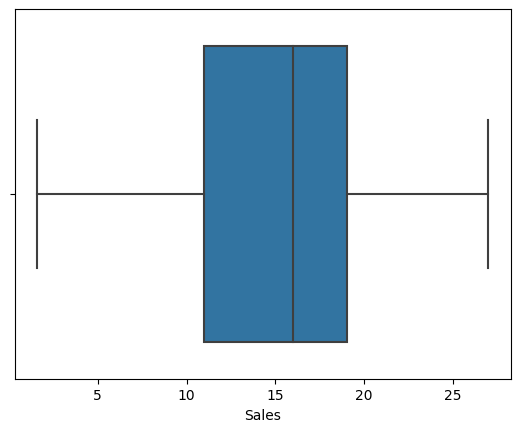

In [24]:
sns.boxplot(x=df['Sales'])
plt.show()

* Vamos ver como as vendas estão relacionadas com outras variáveis usando gráfico de dispersão.

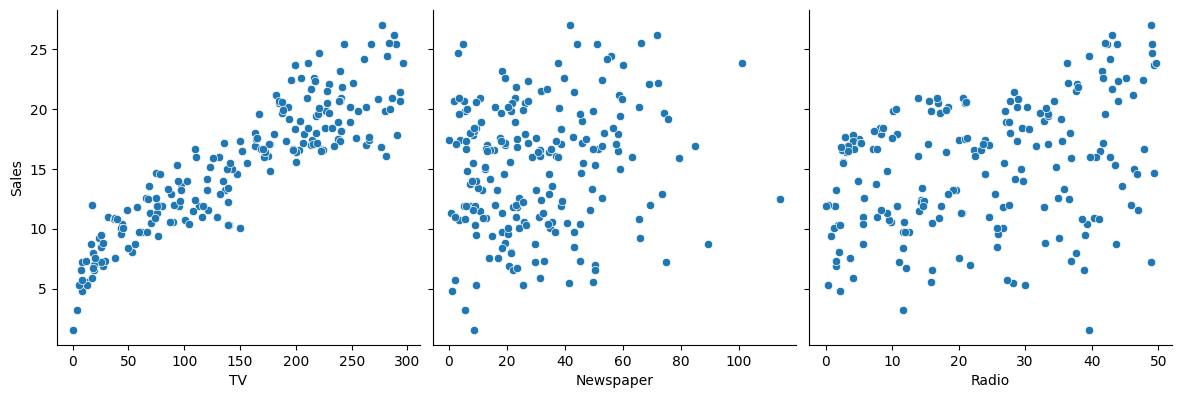

In [25]:
sns.pairplot(
    df,
    x_vars=['TV', 'Newspaper', 'Radio'],
    y_vars='Sales',
    height=4,
    aspect=1,
    kind='scatter'
)
plt.show()

* Vamos ver a correlação entre diferentes variáveis.

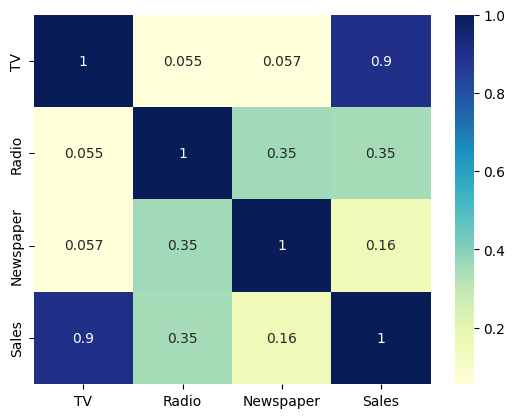

In [26]:
sns.heatmap(
    df.corr(),
    cmap="YlGnBu",
    annot = True
)
plt.show()

* Como é visível no gráfico de pares e no mapa de calor, a variável TV parece estar mais correlacionada com Vendas. Então, vamos realizar uma regressão linear simples usando TV como nossa variável de recurso.

# Construção de modelo

* Performing Simple Linear Regression

  * Equação de regressão linear
    * y=c+m1x1+m2x2+...+mnxn


* y é a resposta

* c é a interceptação

* m1 é o coeficiente para o primeiro recurso

* mn é o coeficiente para a enésima característica

No nosso caso: y = c + m1 x TV

Os valores são chamados de coeficientes de modelo ou parâmetros de modelo.

In [27]:
'''
Etapas genéricas na construção de modelo usando statsmodels
Primeiro, atribuímos a variável de recurso, TV,
neste caso, à variável X e a variável de resposta, Sales, à variável y.
'''
X = df['TV']
y = df['Sales']

* Divisão de Treino e Teste

Agora vamos dividir nossa variável em conjuntos de treinamento e teste, importando train_test_split da biblioteca sklearn.model_selection. Geralmente, é uma boa prática manter 70% dos dados em seu conjunto de dados de treino e os 30% restantes em seu conjunto de dados de teste

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    train_size = 0.7,
    test_size = 0.3,
    random_state = 100
)

In [29]:
# Vamos agora dar uma olhada no conjunto de dados de treino
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [30]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

* Construindo um Modelo Linear

Primeiro, você precisa importar a biblioteca statsmodel.api com a qual executará a regressão linear.

Por padrão, a biblioteca statsmodels ajusta uma linha no conjunto de dados que passa pela origem. Mas para ter uma interceptação, você precisa usar manualmente o atributo add_constant de statsmodels. E depois de adicionar a constante ao seu conjunto de dados X_train, você pode ir em frente e ajustar uma linha de regressão usando o atributo OLS (Ordinary Least Squares) de statsmodels como mostrado abaixo

In [31]:
# Adicione uma constante para obter uma interceptação
X_train_sm = sm.add_constant(X_train)

# Ajuste a linha de regressão usando 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [32]:
# Imprima os parâmetros, ou seja,
# a interceptação e a inclinação da linha de regressão ajustada

lr.params

const    6.948683
TV       0.054546
dtype: float64

In [33]:
# A execução de uma operação de resumo
# lista todos os diferentes parâmetros da linha de regressão ajustada

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 25 Jun 2023   Prob (F-statistic):           1.52e-52
Time:                        16:38:02   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

* Observando algumas estatísticas importantes do resumo
Os valores com os quais estamos preocupados são -

  * Os coeficientes e significância (valores-p)
R ao quadrado
Estatística F e seu significado
1. O coeficiente para TV é 0,054, com um valor p muito baixo
O coeficiente é estatisticamente significativo. Portanto, a associação não é puramente por acaso.

2. R - ao quadrado é 0,816
Significando que 81,6% da variação nas vendas é explicada pela TV

  * Este é um valor R-quadrado decente.

3. A estatística F tem um valor p muito baixo (praticamente baixo)
O que significa que o ajuste do modelo é estatisticamente significativo e a variância explicada não é puramente por acaso.

O ajuste é significativo. Vamos visualizar o quão bem o modelo se ajusta aos dados.

A partir dos parâmetros que obtemos, nossa equação de regressão linear se torna:

Vendas = 6,948 + 0,054 x TV

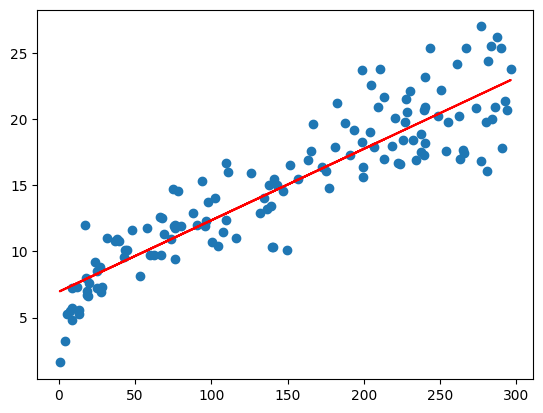

In [34]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

# Avaliação do modelo

* Análise residual
  * Para validar as suposições do modelo e, portanto, a confiabilidade para inferência

* Distribuição dos termos de erro
  * Precisamos verificar se os termos de erro também são normalmente distribuídos (o que é, de fato, uma das principais suposições da regressão linear), vamos plotar o histograma dos termos de erro e ver como fica.

In [35]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

<ipython-input-37-9fc6ee9b06c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


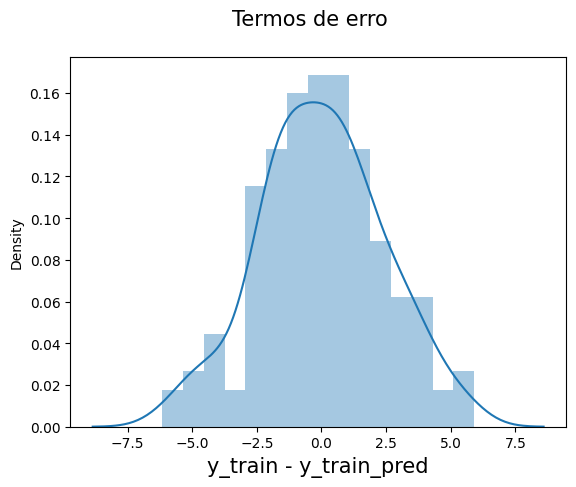

In [37]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Termos de erro', fontsize = 15)                  # Plot heading
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

* Os resíduos seguem a distribuição normal com média 0. Tudo bem!

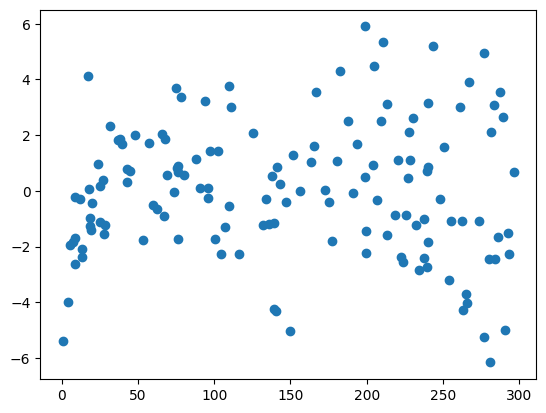

In [38]:
# Procurando por padrões nos resíduos
plt.scatter(X_train,res)
plt.show()

Estamos confiantes de que o ajuste do modelo não é por acaso e tem um poder preditivo decente. A normalidade dos termos residuais permite alguma inferência sobre os coeficientes.

Porém, a variância dos resíduos aumentando com X indica que existe uma variação significativa que este modelo não consegue explicar.

Como você pode ver, a linha de regressão se ajusta muito bem aos dados

# Previsões no conjunto de teste

* Agora que você ajustou uma linha de regressão em seu conjunto de dados de treinamento, é hora de fazer algumas previsões sobre os dados de teste. Para isso, primeiro você precisa adicionar uma constante aos dados X_test como fez para X_train e então você pode simplesmente continuar e prever os valores y correspondentes a X_test usando o atributo predict da linha de regressão ajustada.

In [39]:
# Adicione uma constante ao X_test
X_test_sm = sm.add_constant(X_test)

# Preveja os valores de y correspondentes a X_test_sm
y_pred = lr.predict(X_test_sm)

In [40]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

* Vamos ver o erro quadrático médio

In [42]:
#Retorna o erro quadrático médio; vamos tirar uma raiz quadrada
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

* Verificando o R-quadrado no conjunto de teste

In [43]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

# Visualizando o ajuste no conjunto de teste

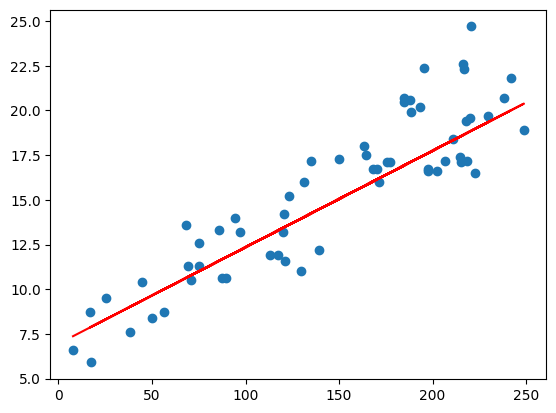

In [44]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()